In [25]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import initializers, regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV



10000


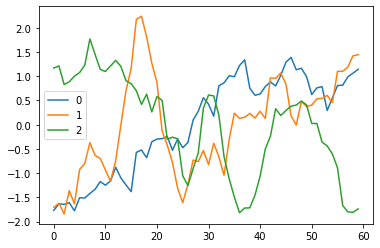

In [26]:
str0 = "ts_L60_Z12_A500_DX50_bias5_N10000"

fnamex = "DATA/x_"+str0+".csv"
fnamey = "DATA/y_"+str0+".csv"

x = np.asarray(pd.read_csv(fnamex, header = None))

N = len(x)
print(N)

scaler = StandardScaler()
x_std =  scaler.fit_transform(x.T).T

plt.plot(x_std[0], label = '0')
plt.plot(x_std[1], label = '1')
plt.plot(x_std[2], label = '2')
plt.legend()
plt.show() 

In [27]:
categ  = np.asarray(pd.read_csv(fnamey, header = None), dtype = int)
N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.
    
print(y[0])

[1. 0. 0.]


## Data splitting


In [28]:
perc_train = 0.8
N_train = int(N*perc_train)
N_val = N-N_train

x_train = x_std[:N_train]
y_train = y[:N_train]
x_val = x_std[N_train:]
y_val = y[N_train:]


L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


## Data reshaping

In [29]:
x_train = x_train.reshape(x_train.shape[0],L,1) #1 - channel (RGB:3)
                                                # L = sample size
x_val = x_val.reshape(x_val.shape[0],L,1)

input_shape = (L,1)

# CNN definition


In [30]:
np.random.seed(12345)

reg = regularizers.l2(0.01) #Lasso

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
#kernel_size = 11... similar to 12 as before
model.add(Conv1D( filters = 5, kernel_size = 11, kernel_regularizer = reg, 
                 kernel_initializer = ini, 
                 activation = "relu", 
                 input_shape = input_shape                
                ))
model.add(MaxPooling1D(5))
model.add(Conv1D(filters = 5, kernel_size = 7, 
                 activation = "relu", 
                ))
model.add(MaxPooling1D(2)) #optional
model.add(Flatten())
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation = "softmax"))

model.summary()

model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = "adam", 
             metrics = ["accuracy"])

# model.save_weights("Original_Weights_CNN1.h5")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 5)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 5)              0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)               

Not Working!
The NN has as input larger and larger numbers. We shall manipulate the data at the beginning for example reshuffling them as they have average 0 and remove their standard deviation (set it to 1)


In [31]:
hist = model.fit(x_train, y_train, batch_size = 250, epochs = 250, 
                 validation_data = (x_val, y_val), 
                verbose = 2, shuffle = True)

Epoch 1/250
32/32 - 0s - loss: 1.0999 - accuracy: 0.3479 - val_loss: 1.0964 - val_accuracy: 0.3670
Epoch 2/250
32/32 - 0s - loss: 1.0949 - accuracy: 0.3640 - val_loss: 1.0901 - val_accuracy: 0.3880
Epoch 3/250
32/32 - 0s - loss: 1.0870 - accuracy: 0.3935 - val_loss: 1.0748 - val_accuracy: 0.4180
Epoch 4/250
32/32 - 0s - loss: 1.0666 - accuracy: 0.4334 - val_loss: 1.0431 - val_accuracy: 0.4945
Epoch 5/250
32/32 - 0s - loss: 1.0268 - accuracy: 0.4986 - val_loss: 0.9893 - val_accuracy: 0.5685
Epoch 6/250
32/32 - 0s - loss: 0.9713 - accuracy: 0.5403 - val_loss: 0.9250 - val_accuracy: 0.6105
Epoch 7/250
32/32 - 0s - loss: 0.9218 - accuracy: 0.5680 - val_loss: 0.8794 - val_accuracy: 0.6350
Epoch 8/250
32/32 - 0s - loss: 0.8949 - accuracy: 0.5894 - val_loss: 0.8482 - val_accuracy: 0.6520
Epoch 9/250
32/32 - 0s - loss: 0.8674 - accuracy: 0.6065 - val_loss: 0.8242 - val_accuracy: 0.6590
Epoch 10/250
32/32 - 0s - loss: 0.8447 - accuracy: 0.6331 - val_loss: 0.8079 - val_accuracy: 0.6760
Epoch 11/

32/32 - 0s - loss: 0.5231 - accuracy: 0.8119 - val_loss: 0.5155 - val_accuracy: 0.8135
Epoch 84/250
32/32 - 0s - loss: 0.5120 - accuracy: 0.8164 - val_loss: 0.5163 - val_accuracy: 0.8165
Epoch 85/250
32/32 - 0s - loss: 0.5213 - accuracy: 0.8102 - val_loss: 0.5093 - val_accuracy: 0.8170
Epoch 86/250
32/32 - 0s - loss: 0.5205 - accuracy: 0.8175 - val_loss: 0.5144 - val_accuracy: 0.8110
Epoch 87/250
32/32 - 0s - loss: 0.5218 - accuracy: 0.8185 - val_loss: 0.5113 - val_accuracy: 0.8175
Epoch 88/250
32/32 - 0s - loss: 0.5203 - accuracy: 0.8189 - val_loss: 0.5142 - val_accuracy: 0.8155
Epoch 89/250
32/32 - 0s - loss: 0.5088 - accuracy: 0.8179 - val_loss: 0.5108 - val_accuracy: 0.8195
Epoch 90/250
32/32 - 0s - loss: 0.5077 - accuracy: 0.8205 - val_loss: 0.5145 - val_accuracy: 0.8170
Epoch 91/250
32/32 - 0s - loss: 0.5111 - accuracy: 0.8171 - val_loss: 0.5119 - val_accuracy: 0.8155
Epoch 92/250
32/32 - 0s - loss: 0.5152 - accuracy: 0.8195 - val_loss: 0.5099 - val_accuracy: 0.8155
Epoch 93/250


Epoch 165/250
32/32 - 0s - loss: 0.4829 - accuracy: 0.8256 - val_loss: 0.4951 - val_accuracy: 0.8265
Epoch 166/250
32/32 - 0s - loss: 0.4830 - accuracy: 0.8273 - val_loss: 0.4949 - val_accuracy: 0.8205
Epoch 167/250
32/32 - 0s - loss: 0.4851 - accuracy: 0.8271 - val_loss: 0.4937 - val_accuracy: 0.8265
Epoch 168/250
32/32 - 0s - loss: 0.4867 - accuracy: 0.8276 - val_loss: 0.5014 - val_accuracy: 0.8205
Epoch 169/250
32/32 - 0s - loss: 0.4823 - accuracy: 0.8273 - val_loss: 0.4949 - val_accuracy: 0.8225
Epoch 170/250
32/32 - 0s - loss: 0.4803 - accuracy: 0.8303 - val_loss: 0.4987 - val_accuracy: 0.8270
Epoch 171/250
32/32 - 0s - loss: 0.4860 - accuracy: 0.8296 - val_loss: 0.4928 - val_accuracy: 0.8245
Epoch 172/250
32/32 - 0s - loss: 0.4798 - accuracy: 0.8295 - val_loss: 0.4954 - val_accuracy: 0.8240
Epoch 173/250
32/32 - 0s - loss: 0.4856 - accuracy: 0.8289 - val_loss: 0.4941 - val_accuracy: 0.8250
Epoch 174/250
32/32 - 0s - loss: 0.4786 - accuracy: 0.8280 - val_loss: 0.5020 - val_accurac

32/32 - 0s - loss: 0.4620 - accuracy: 0.8370 - val_loss: 0.4763 - val_accuracy: 0.8230
Epoch 247/250
32/32 - 0s - loss: 0.4555 - accuracy: 0.8379 - val_loss: 0.4762 - val_accuracy: 0.8290
Epoch 248/250
32/32 - 0s - loss: 0.4658 - accuracy: 0.8307 - val_loss: 0.4738 - val_accuracy: 0.8260
Epoch 249/250
32/32 - 0s - loss: 0.4585 - accuracy: 0.8355 - val_loss: 0.4786 - val_accuracy: 0.8300
Epoch 250/250
32/32 - 0s - loss: 0.4617 - accuracy: 0.8370 - val_loss: 0.4789 - val_accuracy: 0.8245


## Confusion Matrix

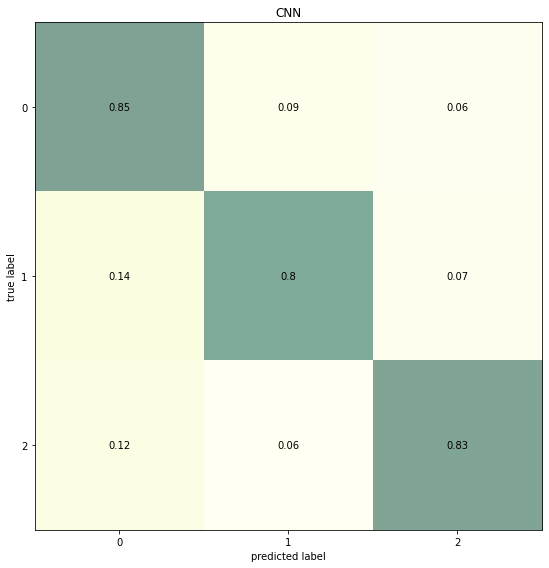

In [32]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(categ[N_train:],np.argmax(model.predict(x_val), axis=1),  normalize = 'true')


#Better visualization of confusion matrices
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15, 8))
ax1.matshow(c_matrix, cmap = plt.cm.YlGn, alpha = 0.5)
ax1.set_xticks(np.arange(3))
ax1.set_yticks(np.arange(3))
for i in range(3):
    for j in range(3):
        ax1.text(x=j, y=i, s=round(c_matrix[i, j],2), ha="center", va="center")
ax1.xaxis.set_ticks_position('bottom')
ax1.set_xlabel('predicted label')
ax1.set_ylabel('true label')
ax1.set_title('CNN')
fig.tight_layout()
plt.show()

## Test Discrimination loss

In [37]:
As = np.linspace(50,500,10)
res = []

y_predicted_list = []

for A in As:
    str0 = f"ts_L60_Z12_A{A}_DX50_bias5_N10000"
    fnamex = "DATA/x_" + str0 + ".csv"
    fnamey = "DATA/y_" + str0 + ".csv"

    x = np.asarray(pd.read_csv(fnamex, header = None))

    scaler = StandardScaler()
    x_std =  scaler.fit_transform(x.T).T
    categ  = np.asarray(pd.read_csv(fnamey, header = None), dtype = int)
    N_categ = 3
    y = np.zeros((N,N_categ))

    for n in range(N):
        y[n][categ[n]] = 1.

    perc_train = 0.8
    N_train = int(N*perc_train)
    N_val = N-N_train

    x_train = x_std[:N_train]
    y_train = y[:N_train]
    x_val = x_std[N_train:]
    y_val = y[N_train:]


    L = len(x[0])
    x_train = x_train.reshape(x_train.shape[0],L,1) #1 - channel (RGB:3)
                                                   # L = sample size
    x_val = x_val.reshape(x_val.shape[0],L,1)

    input_shape = (L,1)

    model.load_weights("Original_Weights_CNN1.h5")
    hist = model.fit(x_train, y_train, batch_size = 250, epochs = 15, 
                 validation_data = (x_val, y_val), 
                verbose = 2, shuffle = True)
    res.append(pd.DataFrame(hist.history).iloc[:,-1])
    y_predicted_list.append(np.argmax(model.predict(x_val), axis = 1))

Epoch 1/15
32/32 - 0s - loss: 1.1016 - accuracy: 0.3305 - val_loss: 1.1004 - val_accuracy: 0.3400
Epoch 2/15
32/32 - 0s - loss: 1.1003 - accuracy: 0.3359 - val_loss: 1.1001 - val_accuracy: 0.3365
Epoch 3/15
32/32 - 0s - loss: 1.1003 - accuracy: 0.3346 - val_loss: 1.0999 - val_accuracy: 0.3605
Epoch 4/15
32/32 - 0s - loss: 1.1003 - accuracy: 0.3347 - val_loss: 1.0999 - val_accuracy: 0.3595
Epoch 5/15
32/32 - 0s - loss: 1.1001 - accuracy: 0.3356 - val_loss: 1.0999 - val_accuracy: 0.3525
Epoch 6/15
32/32 - 0s - loss: 1.1001 - accuracy: 0.3400 - val_loss: 1.0998 - val_accuracy: 0.3490
Epoch 7/15
32/32 - 0s - loss: 1.1000 - accuracy: 0.3352 - val_loss: 1.0998 - val_accuracy: 0.3490
Epoch 8/15
32/32 - 0s - loss: 1.1003 - accuracy: 0.3428 - val_loss: 1.0997 - val_accuracy: 0.3580
Epoch 9/15
32/32 - 0s - loss: 1.1003 - accuracy: 0.3346 - val_loss: 1.0997 - val_accuracy: 0.3520
Epoch 10/15
32/32 - 0s - loss: 1.1001 - accuracy: 0.3375 - val_loss: 1.0997 - val_accuracy: 0.3565
Epoch 11/15
32/32 -

Epoch 10/15
32/32 - 0s - loss: 1.0858 - accuracy: 0.3985 - val_loss: 1.0806 - val_accuracy: 0.4125
Epoch 11/15
32/32 - 0s - loss: 1.0831 - accuracy: 0.3971 - val_loss: 1.0776 - val_accuracy: 0.4200
Epoch 12/15
32/32 - 0s - loss: 1.0803 - accuracy: 0.3994 - val_loss: 1.0740 - val_accuracy: 0.4240
Epoch 13/15
32/32 - 0s - loss: 1.0775 - accuracy: 0.4084 - val_loss: 1.0701 - val_accuracy: 0.4315
Epoch 14/15
32/32 - 0s - loss: 1.0741 - accuracy: 0.4179 - val_loss: 1.0671 - val_accuracy: 0.4430
Epoch 15/15
32/32 - 0s - loss: 1.0694 - accuracy: 0.4216 - val_loss: 1.0625 - val_accuracy: 0.4395
Epoch 1/15
32/32 - 0s - loss: 1.1017 - accuracy: 0.3314 - val_loss: 1.1002 - val_accuracy: 0.3410
Epoch 2/15
32/32 - 0s - loss: 1.0984 - accuracy: 0.3599 - val_loss: 1.0974 - val_accuracy: 0.3790
Epoch 3/15
32/32 - 0s - loss: 1.0959 - accuracy: 0.3729 - val_loss: 1.0949 - val_accuracy: 0.3885
Epoch 4/15
32/32 - 0s - loss: 1.0944 - accuracy: 0.3819 - val_loss: 1.0921 - val_accuracy: 0.4045
Epoch 5/15
32/

In [ ]:
#Better visualization of confusion matrices
fig, ax1 = plt.subplots(nrows=3, ncols=3, figsize = (15, 8))

for i in range(3):
    for j in range(3):
        c_matrix = confusion_matrix(categ[N_train:],y_predicted_list[3*i+j],  normalize = 'true')
        ax1[i,j].matshow(c_matrix, cmap = plt.cm.YlGn, alpha = 0.5)
        ax1[i,j].set_xticks(np.arange(3))
        ax1[i,j].set_yticks(np.arange(3))
        for l in range(3):
            for m in range(3):
                ax1[i,j].text(x=l, y=m, s=round(c_matrix[m, l],2), ha="center", va="center")
        ax1[i,j].xaxis.set_ticks_position('bottom')
        ax1[i,j].set_xlabel('predicted label')
        ax1[i,j].set_ylabel('true label')
        ax1[i,j].set_title(f"AmplitudeToNoiseRatio: {As[3*i+j]/50} ")
        fig.tight_layout()
plt.show()

In [ ]:
np.asarray(res).save_txt("Results_Discrimination.csv")
np.asarray(y_predicted_list).save_txt("Results_YPredicted.csv")

# POINT 3 

# Data

In [3]:
x = np.loadtxt("DATA/x_ts_comp_N10000.csv", delimiter =",")
categ_y = np.loadtxt("DATA/y_ts_comp_N10000.csv", delimiter =",")

scaler = StandardScaler()
x =  scaler.fit_transform(x.T).T


In [4]:
y = to_categorical(categ_y)

In [5]:
L = len(x[0])
input_shape = (len(x[0]),1)
N_categ = 3

In [6]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
x_train = x_train.reshape(x_train.shape[0],L,1)
x_test = x_test.reshape(x_test.shape[0],L,1)

# Models

## 1

In [10]:
reg = regularizers.l2(0.001)
np.random.seed(12345)

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters=4, kernel_size = 10,
                kernel_regularizer = reg,
                kernel_initializer=ini,
                activation = "relu",
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="sigmoid"))

print(model.summary())

opt = keras.optimizers.SGD(lr=0.1, momentum= 0.9, nesterov=True, decay = 1e-6)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 51, 4)             44        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 4)             0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                410       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

In [11]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 1s 7ms/step - loss: 1.1015 - accuracy: 0.3261 - val_loss: 1.0953 - val_accuracy: 0.3585
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3590 - val_loss: 1.0916 - val_accuracy: 0.3780
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0900 - accuracy: 0.3908 - val_loss: 1.0841 - val_accuracy: 0.3810
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0807 - accuracy: 0.4071 - val_loss: 1.0740 - val_accuracy: 0.4105
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0703 - accuracy: 0.4142 - val_loss: 1.0557 - val_accuracy: 0.4165
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0509 - accuracy: 0.4374 - val_loss: 1.0393 - val_accuracy: 0.4300
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0354 - accuracy: 0.4437 - val_loss: 1.0237 - val_accuracy: 0.4495
Epoch 8/250
3

Epoch 59/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.6763 - val_loss: 0.6930 - val_accuracy: 0.6770
Epoch 60/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.6859 - val_loss: 0.6873 - val_accuracy: 0.6800
Epoch 61/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.6836 - val_loss: 0.6878 - val_accuracy: 0.6760
Epoch 62/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6855 - val_loss: 0.6882 - val_accuracy: 0.6745
Epoch 63/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6900 - val_loss: 0.6838 - val_accuracy: 0.6770
Epoch 64/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6889 - val_loss: 0.6865 - val_accuracy: 0.6735
Epoch 65/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6848 - val_loss: 0.6848 - val_accuracy: 0.6765
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6905 - val_loss: 0.6556 - val_accuracy: 0.6995
Epoch 174/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.7055 - val_loss: 0.6547 - val_accuracy: 0.6985
Epoch 175/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7108 - val_loss: 0.6563 - val_accuracy: 0.6995
Epoch 176/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.6980 - val_loss: 0.6597 - val_accuracy: 0.7010
Epoch 177/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7059 - val_loss: 0.6561 - val_accuracy: 0.7045
Epoch 178/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7101 - val_loss: 0.6569 - val_accuracy: 0.7000
Epoch 179/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.7154 - val_loss: 0.6614 - val_accuracy: 0.6945
Epoch 180/250

## 2

In [42]:
from keras import initializers, regularizers
reg = regularizers.l2(0.001)
np.random.seed(12345)

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters=3, kernel_size = 5,
                kernel_regularizer = reg,
                kernel_initializer=ini,
                activation = "relu",
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(12,activation="relu"))

model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="sigmoid"))

print(model.summary())

opt = keras.optimizers.SGD(lr=0.1, momentum= 0.9, nesterov=True, decay = 1e-6)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 56, 3)             18        
_________________________________________________________________
average_pooling1d_25 (Averag (None, 11, 3)             0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 33)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 12)                408       
_________________________________________________________________
dropout_26 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 3)                 39        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_______________________________________________________

In [27]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 1s 14ms/step - loss: 1.0991 - accuracy: 0.3449 - val_loss: 1.0981 - val_accuracy: 0.3680
Epoch 2/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0965 - accuracy: 0.3650 - val_loss: 1.0946 - val_accuracy: 0.3865
Epoch 3/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0919 - accuracy: 0.3948 - val_loss: 1.0874 - val_accuracy: 0.3985
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0843 - accuracy: 0.3978 - val_loss: 1.0751 - val_accuracy: 0.4040
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0704 - accuracy: 0.4190 - val_loss: 1.0583 - val_accuracy: 0.4140
Epoch 6/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0551 - accuracy: 0.4220 - val_loss: 1.0428 - val_accuracy: 0.4295
Epoch 7/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0441 - accuracy: 0.4384 - val_loss: 1.0302 - val_accuracy: 0.4405
Epoch 8/250


Epoch 59/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9073 - accuracy: 0.5227 - val_loss: 0.9129 - val_accuracy: 0.5225
Epoch 60/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8874 - accuracy: 0.5404 - val_loss: 0.9130 - val_accuracy: 0.5160
Epoch 61/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8872 - accuracy: 0.5326 - val_loss: 0.9099 - val_accuracy: 0.5215
Epoch 62/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9073 - accuracy: 0.5204 - val_loss: 0.9076 - val_accuracy: 0.5060
Epoch 63/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8862 - accuracy: 0.5413 - val_loss: 0.9057 - val_accuracy: 0.5200
Epoch 64/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8829 - accuracy: 0.5361 - val_loss: 0.9067 - val_accuracy: 0.5100
Epoch 65/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8912 - accuracy: 0.5236 - val_loss: 0.8993 - val_accuracy: 0.5125
Epoch 

32/32 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.6442 - val_loss: 0.7260 - val_accuracy: 0.6425
Epoch 174/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.6549 - val_loss: 0.7239 - val_accuracy: 0.6450
Epoch 175/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.6567 - val_loss: 0.7243 - val_accuracy: 0.6475
Epoch 176/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.6526 - val_loss: 0.7236 - val_accuracy: 0.6450
Epoch 177/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.6510 - val_loss: 0.7258 - val_accuracy: 0.6440
Epoch 178/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.6513 - val_loss: 0.7233 - val_accuracy: 0.6425
Epoch 179/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.6569 - val_loss: 0.7234 - val_accuracy: 0.6435
Epoch 180/250

## 3

In [36]:
from keras import initializers, regularizers
reg = regularizers.l2(0.001)
np.random.seed(12345)

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters=13, kernel_size = 23,
                kernel_regularizer = reg,
                kernel_initializer=ini,
                activation = "relu",
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="sigmoid"))

print(model.summary())

opt = keras.optimizers.SGD(lr=0.1, momentum= 0.9, nesterov=True, decay = 1e-6)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 38, 13)            312       
_________________________________________________________________
average_pooling1d_20 (Averag (None, 7, 13)             0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 91)                0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 91)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 276       
Total params: 588
Trainable params: 588
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 1s 14ms/step - loss: 1.1259 - accuracy: 0.3460 - val_loss: 1.1082 - val_accuracy: 0.3565
Epoch 2/250
32/32 [==============================] - 0s 7ms/step - loss: 1.1026 - accuracy: 0.3756 - val_loss: 1.0967 - val_accuracy: 0.3995
Epoch 3/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0928 - accuracy: 0.4165 - val_loss: 1.0852 - val_accuracy: 0.3960
Epoch 4/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0812 - accuracy: 0.4178 - val_loss: 1.0744 - val_accuracy: 0.4075
Epoch 5/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0711 - accuracy: 0.4275 - val_loss: 1.0646 - val_accuracy: 0.4310
Epoch 6/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0654 - accuracy: 0.4342 - val_loss: 1.0566 - val_accuracy: 0.4365
Epoch 7/250
32/32 [==============================] - 0s 8ms/step - loss: 1.0658 - accuracy: 0.4352 - val_loss: 1.0499 - val_accuracy: 0.4295
Epoch 8/250


Epoch 59/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8081 - accuracy: 0.6677 - val_loss: 0.7554 - val_accuracy: 0.7090
Epoch 60/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7964 - accuracy: 0.6873 - val_loss: 0.7557 - val_accuracy: 0.7120
Epoch 61/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7926 - accuracy: 0.6828 - val_loss: 0.7534 - val_accuracy: 0.7115
Epoch 62/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8036 - accuracy: 0.6768 - val_loss: 0.7530 - val_accuracy: 0.7080
Epoch 63/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7905 - accuracy: 0.6801 - val_loss: 0.7501 - val_accuracy: 0.7100
Epoch 64/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7962 - accuracy: 0.6750 - val_loss: 0.7510 - val_accuracy: 0.7010
Epoch 65/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7870 - accuracy: 0.6838 - val_loss: 0.7485 - val_accuracy: 0.7085
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.7199 - accuracy: 0.7193 - val_loss: 0.6730 - val_accuracy: 0.7445
Epoch 174/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7255 - accuracy: 0.7190 - val_loss: 0.6721 - val_accuracy: 0.7455
Epoch 175/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7217 - accuracy: 0.7147 - val_loss: 0.6736 - val_accuracy: 0.7385
Epoch 176/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7149 - accuracy: 0.7178 - val_loss: 0.6703 - val_accuracy: 0.7440
Epoch 177/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7173 - accuracy: 0.7284 - val_loss: 0.6734 - val_accuracy: 0.7365
Epoch 178/250
32/32 [==============================] - 0s 5ms/step - loss: 0.7118 - accuracy: 0.7192 - val_loss: 0.6713 - val_accuracy: 0.7440
Epoch 179/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7103 - accuracy: 0.7286 - val_loss: 0.6693 - val_accuracy: 0.7455
Epoch 180/250

The best result is achieved by the combination of a strong Convolutional neural network and one dense layer. We can also appreciate how the number of parameters increases a lot with the number of filters, while the kernel size has a minimum effect. In practice if we change the kernel size or the number of nodes in the dense layer we obtain approximately the same result.

# Regularization

We use the same model we used in lessons to evaluate how regulations values change the results

In [7]:
def create_CNN(reg = regularizers.l2, l= 0.001):
    np.random.seed(12345)

    ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

    model = Sequential()
    model.add(Conv1D(filters=4, kernel_size = 10,
                    kernel_regularizer = reg(l),
                    kernel_initializer=ini,
                    activation = "relu",
                    input_shape = input_shape
                    ))
    model.add(AveragePooling1D(5))
    model.add(Flatten())
    model.add(Dense(10,activation="relu"))
    model.add(Dense(10,activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(N_categ, activation="sigmoid"))
    
    return model

In [8]:
def compile_model(reg = regularizers.l2, l= 0.001):
    # create the mode
    model=create_CNN(reg,l)
    # compile the model
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

    return model


In [20]:
df_GridSearch = pd.read_csv("DATA/Regularization_results.csv", index_col = False)
df_GridSearch = df_GridSearch.iloc[:,1:]
df_GridSearch.sort_values(by = "rank_test_score", ascending = False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l,param_reg,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,11.743135,0.396809,0.144392,0.006275,0.1000,<class 'tensorflow.python.keras.regularizers.L1'>,"{'l': 0.1, 'reg': <class 'tensorflow.python.ke...",0.3205,0.3360,0.3140,0.3305,0.325250,0.008548,11
2,15.555042,4.664063,0.180385,0.043716,0.1000,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.1, 'reg': <function l1_l2 at 0x7fa2bbc...",0.3205,0.3360,0.3140,0.3305,0.325250,0.008548,11
3,15.651340,4.081976,0.188800,0.040384,0.0100,<class 'tensorflow.python.keras.regularizers.L1'>,"{'l': 0.01, 'reg': <class 'tensorflow.python.k...",0.6730,0.5395,0.6810,0.5525,0.611500,0.065722,10
10,15.346722,4.184644,0.158263,0.033479,0.0001,<class 'tensorflow.python.keras.regularizers.L2'>,"{'l': 0.0001, 'reg': <class 'tensorflow.python...",0.5415,0.7125,0.7245,0.7145,0.673250,0.076202,9
5,14.771484,4.224691,0.172961,0.031725,0.0100,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.01, 'reg': <function l1_l2 at 0x7fa2bb...",0.7050,0.5505,0.7255,0.7180,0.674750,0.072110,8
1,11.804894,0.155126,0.144236,0.008223,0.1000,<class 'tensorflow.python.keras.regularizers.L2'>,"{'l': 0.1, 'reg': <class 'tensorflow.python.ke...",0.7130,0.6915,0.6825,0.7225,0.702375,0.016056,7
6,16.286934,3.832132,0.168695,0.035507,0.0010,<class 'tensorflow.python.keras.regularizers.L1'>,"{'l': 0.001, 'reg': <class 'tensorflow.python....",0.6950,0.6920,0.7335,0.6980,0.704625,0.016805,6
11,16.200689,4.584406,0.182908,0.044824,0.0001,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.0001, 'reg': <function l1_l2 at 0x7fa2...",0.6950,0.7170,0.7315,0.6980,0.710375,0.014830,5
8,14.526269,4.302998,0.192493,0.048365,0.0010,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.001, 'reg': <function l1_l2 at 0x7fa2b...",0.6930,0.7165,0.6945,0.7445,0.712125,0.020879,4
4,12.064559,1.456055,0.162866,0.031747,0.0100,<class 'tensorflow.python.keras.regularizers.L2'>,"{'l': 0.01, 'reg': <class 'tensorflow.python.k...",0.6880,0.7120,0.7180,0.7320,0.712500,0.015898,3


Best fits are achieved by weak regularizers, as expected. Also L2 allows to have stronger regularization with similarr results, these can be seen as the best tradeoffs as they allows to get good accuracy with also a stronger regularization.

In [10]:
batch_size = 250
epochs = 250

model1 = compile_model( regularizers.l2,  0.1)
model2 = compile_model( regularizers.l2,  0.001)

model1.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)
model2.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 0s 6ms/step - loss: 1.1117 - accuracy: 0.3287 - val_loss: 1.1054 - val_accuracy: 0.3435
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1042 - accuracy: 0.3459 - val_loss: 1.1009 - val_accuracy: 0.3520
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0992 - accuracy: 0.3746 - val_loss: 1.0954 - val_accuracy: 0.3850
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0939 - accuracy: 0.3757 - val_loss: 1.0883 - val_accuracy: 0.4280
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0907 - accuracy: 0.3798 - val_loss: 1.0818 - val_accuracy: 0.4350
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0822 - accuracy: 0.4114 - val_loss: 1.0652 - val_accuracy: 0.4680
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0710 - accuracy: 0.4192 - val_loss: 1.0454 - val_accuracy: 0.4730
Epoch 8/250
3

Epoch 59/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7413 - accuracy: 0.6614 - val_loss: 0.7102 - val_accuracy: 0.6680
Epoch 60/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7269 - accuracy: 0.6652 - val_loss: 0.7067 - val_accuracy: 0.6660
Epoch 61/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.6713 - val_loss: 0.7028 - val_accuracy: 0.6720
Epoch 62/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7355 - accuracy: 0.6581 - val_loss: 0.7023 - val_accuracy: 0.6710
Epoch 63/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7354 - accuracy: 0.6597 - val_loss: 0.7007 - val_accuracy: 0.6780
Epoch 64/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.6712 - val_loss: 0.6972 - val_accuracy: 0.6780
Epoch 65/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.6790 - val_loss: 0.6956 - val_accuracy: 0.6795
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6885 - val_loss: 0.6711 - val_accuracy: 0.6920
Epoch 117/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6903 - val_loss: 0.6715 - val_accuracy: 0.6985
Epoch 118/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.7006 - val_loss: 0.6700 - val_accuracy: 0.6960
Epoch 119/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6954 - val_loss: 0.6717 - val_accuracy: 0.6965
Epoch 120/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6935 - val_loss: 0.6715 - val_accuracy: 0.6960
Epoch 121/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6868 - val_loss: 0.6737 - val_accuracy: 0.6960
Epoch 122/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6873 - val_loss: 0.6673 - val_accuracy: 0.6980
Epoch 123/250

32/32 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.7149 - val_loss: 0.6594 - val_accuracy: 0.7010
Epoch 174/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7053 - val_loss: 0.6559 - val_accuracy: 0.7070
Epoch 175/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7084 - val_loss: 0.6569 - val_accuracy: 0.7075
Epoch 176/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.7020 - val_loss: 0.6589 - val_accuracy: 0.7045
Epoch 177/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7117 - val_loss: 0.6538 - val_accuracy: 0.7050
Epoch 178/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.7086 - val_loss: 0.6630 - val_accuracy: 0.7065
Epoch 179/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7130 - val_loss: 0.6595 - val_accuracy: 0.6990
Epoch 180/250

32/32 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7157 - val_loss: 0.6549 - val_accuracy: 0.7035
Epoch 231/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7115 - val_loss: 0.6536 - val_accuracy: 0.7045
Epoch 232/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.7143 - val_loss: 0.6508 - val_accuracy: 0.7085
Epoch 233/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.7115 - val_loss: 0.6572 - val_accuracy: 0.7015
Epoch 234/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.7143 - val_loss: 0.6644 - val_accuracy: 0.6895
Epoch 235/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.7215 - val_loss: 0.6480 - val_accuracy: 0.7080
Epoch 236/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.7214 - val_loss: 0.6565 - val_accuracy: 0.7020
Epoch 237/250

Epoch 38/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7841 - accuracy: 0.5978 - val_loss: 0.7590 - val_accuracy: 0.6250
Epoch 39/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.6155 - val_loss: 0.7523 - val_accuracy: 0.6215
Epoch 40/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7666 - accuracy: 0.6253 - val_loss: 0.7388 - val_accuracy: 0.6380
Epoch 41/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7395 - accuracy: 0.6371 - val_loss: 0.7252 - val_accuracy: 0.6435
Epoch 42/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7266 - accuracy: 0.6392 - val_loss: 0.7112 - val_accuracy: 0.6650
Epoch 43/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7174 - accuracy: 0.6512 - val_loss: 0.7040 - val_accuracy: 0.6590
Epoch 44/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.6563 - val_loss: 0.7075 - val_accuracy: 0.6600
Epoch 

Epoch 96/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.7138 - val_loss: 0.6422 - val_accuracy: 0.6985
Epoch 97/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7088 - val_loss: 0.6400 - val_accuracy: 0.6995
Epoch 98/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7119 - val_loss: 0.6404 - val_accuracy: 0.7010
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7038 - val_loss: 0.6394 - val_accuracy: 0.6985
Epoch 100/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7147 - val_loss: 0.6407 - val_accuracy: 0.7010
Epoch 101/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7120 - val_loss: 0.6384 - val_accuracy: 0.6990
Epoch 102/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7057 - val_loss: 0.6401 - val_accuracy: 0.6980
Epo

32/32 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7244 - val_loss: 0.6268 - val_accuracy: 0.7060
Epoch 154/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7355 - val_loss: 0.6264 - val_accuracy: 0.7060
Epoch 155/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.7378 - val_loss: 0.6250 - val_accuracy: 0.7065
Epoch 156/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7373 - val_loss: 0.6271 - val_accuracy: 0.7020
Epoch 157/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7384 - val_loss: 0.6344 - val_accuracy: 0.6975
Epoch 158/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7363 - val_loss: 0.6280 - val_accuracy: 0.6980
Epoch 159/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.7365 - val_loss: 0.6228 - val_accuracy: 0.7080
Epoch 160/250

32/32 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7373 - val_loss: 0.6126 - val_accuracy: 0.7190
Epoch 211/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.7382 - val_loss: 0.6160 - val_accuracy: 0.7180
Epoch 212/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.7526 - val_loss: 0.6134 - val_accuracy: 0.7175
Epoch 213/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.7408 - val_loss: 0.6158 - val_accuracy: 0.7160
Epoch 214/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.7518 - val_loss: 0.6148 - val_accuracy: 0.7175
Epoch 215/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7493 - val_loss: 0.6126 - val_accuracy: 0.7215
Epoch 216/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7510 - val_loss: 0.6127 - val_accuracy: 0.7200
Epoch 217/250

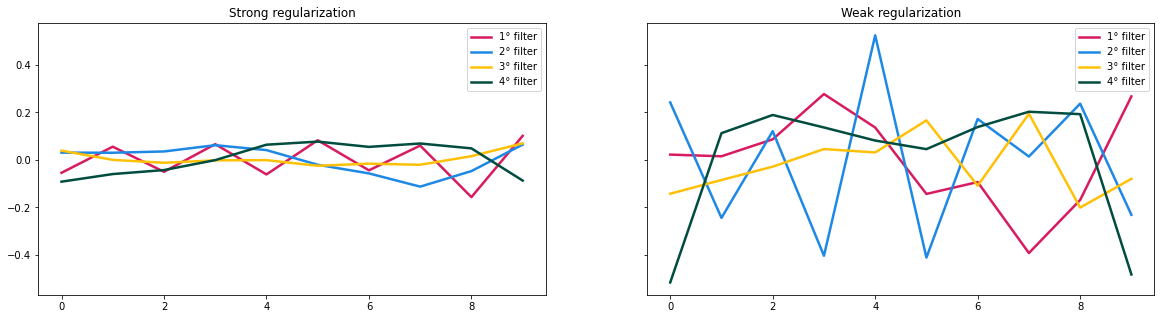

In [24]:
fig, axes = plt.subplots(1,2,figsize=(20,5), sharey=True)
colors = ["#D81B60", "#1E88E5", "#FFC107", "#004D40"]

filters, biases = model1.layers[0].get_weights()
for i in range(4):
    axes[0].plot(filters[:,:,i], color = colors[i],label = "{}° filter".format(i+1), lw =2.5)
axes[0].legend()
axes[0].set_title("Strong regularization")
filters, biases = model2.layers[0].get_weights()
for i in range(4):
    axes[1].plot(filters[:,:,i], color = colors[i], label = f"{i+1}° filter", lw =2.5)
axes[1].legend()
axes[1].set_title("Weak regularization")

plt.show()

In [79]:
results1 = model1.evaluate(x_test, y_test, verbose = 0)
results2 = model2.evaluate(x_test, y_test, verbose = 0)

print(f"Validation loss for strong regularization is {results1[1]:1.2}, while for weak regularization is {results2[1]:1.2}")

Validation loss for strong regularization is 0.71, while for weak regularization is 0.72


One can easily see how strong regularization give weights of almost zero value, while pattern recognition is not visible. Results are also similar in both cases.

## Bias Regularization

In [22]:
reg = regularizers.l2(0.001)
np.random.seed(12345)

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters=4, kernel_size = 10,
                kernel_regularizer = reg,
                bias_regularizer = reg,
                kernel_initializer=ini,
                activation = "relu",
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="sigmoid"))

print(model.summary())

opt = keras.optimizers.SGD(lr=0.1, momentum= 0.9, nesterov=True, decay = 1e-6)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 51, 4)             44        
_________________________________________________________________
average_pooling1d_4 (Average (None, 10, 4)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                